In [1]:
%run -i settings.py

## $\mathrm{n^{++}}$-InAs

In [2]:
# experemental data
cap, volt = ecvproc.cv_read('./data/8-0-866_back-3@0.000.CV', model='Cp')
Diss, _ = ecvproc.cv_read('./data/8-0-866_back-3@0.000.CV', model='Diss')

# simulation results 
data = np.genfromtxt('./data/cap_volt_ion_2e+18.dat')
cc = -data[:,1]
vv = data[:,0]
# linear fitting
cap_fit, volt_fit, doping = ecvproc.lin_fit(cc, vv, 
                                            vmin=0.2, vmax=0.3 )

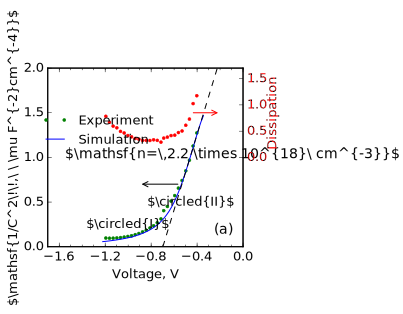

In [3]:
fig, cv = plt.subplots()
fig.set_size_inches(3.5,3.2)
cv_dat, sim, fit = cv.plot(volt[::4], 1/cap[::4]**2, 'g.',
                           vv-0.71, 1/cc**2, 'b',
                           volt_fit-0.71, cap_fit, 'k--')
cv.set_xlabel('Voltage, V')
cv.set_ylabel('\$\\'+mathsf+'{1/C^2\!\!,\ \ \mu F^{-2}cm^{-4}}$')

leg = fig.legend((cv_dat, sim),
                ('Experiment','Simulation'),
                'right', bbox_to_anchor=(0.65,0.8))
leg.draw_frame(False)

cv.text(-1.55, 0.99, 
        '\$\\'+mathsf+'{n=\,'+sci_notation(-doping)+'\ cm^{-3}}$',
        fontsize=14)
cv.annotate('(a)', xy=(1, 0), xycoords='axes fraction',fontsize=14,
            xytext=(-10, 10), textcoords='offset points',
            ha='right', va='bottom')

cv.xaxis.set_major_locator(ticker.MultipleLocator(0.4))
cv.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#plt.tight_layout()

cv.text(-1, 0.25, '\$\\circled{I}$', ha="center", va="center")
cv.text(-0.45, 0.5, '\$\\circled{II}$', ha="center", va="center")

dis = cv.twinx()
dis.plot(volt[::4], Diss[::4], 'r.')
dis.set_ylabel('Dissipation', color='r')
dis.yaxis.set_label_coords(1.12, 0.75)
for tl in dis.get_yticklabels():
    tl.set_color('r')
dis.set_ylim(-1.7, 1.7)
dis.set_yticks([0, 0.5, 1, 1.5])
dis.set_xlim(-1.7, 0)

cv.annotate(
    '', (-0.45, 1.5), (-0.2, 1.5),
    arrowprops={'arrowstyle': '<-', 'color': 'r'})
cv.annotate(
    '', (-0.55, 0.7), (-0.9, 0.7),
    arrowprops={'arrowstyle': '<-', 'color': 'k'})

name1 = 'IP_InAs_CV_fig1'
plt.savefig(name1+'.svg', transparent=True)

## epi-InAs

In [4]:
# experemental data
d = admproc.Data('./data/InAs-609-1_7.dat')
cap = d.cs()*1e6/0.1
volt = d.voltage
# simulation results 
data = np.genfromtxt('./data/cap_volt_1e+15.dat')
cc = -data[:,1]
vv = data[:,0]
# linear fitting
cap_fit, volt_fit, doping = ecvproc.lin_fit(cc, vv, 
                                            vmin=-0.05, vmax=-0.01
                                            #vmin=-0.4, vmax= -0.3
                                            )

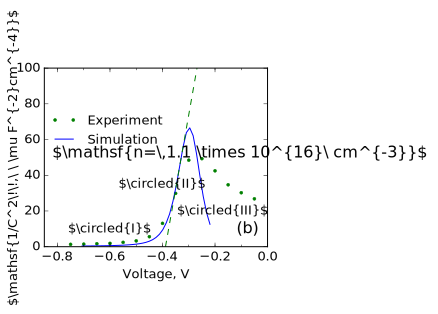

In [5]:
fig = plt.figure()
cv = fig.add_subplot(111)
cv_dat, sim, fit = cv.plot(volt, 1/cap**2, 'g.',
                            vv-0.3, 1/cc**2, 'b',
                            volt_fit-0.3, cap_fit, 'g--')
cv.set_xlim(-0.85, 0)
cv.set_xlabel('Voltage, V')
cv.set_ylabel('\$\\'+mathsf+'{1/C^2\!\!,\ \ \mu F^{-2}cm^{-4}}$')

leg = fig.legend((cv_dat, sim),
                ('Experiment','Simulation'),
                'right', bbox_to_anchor=(0.6,.8))
leg.draw_frame(False)

cv.text(-0.82, 50, 
        '\$\\'+mathsf+'{n=\,'+sci_notation(-doping)+'\ cm^{-3}}$',
        fontsize=16)
cv.annotate('(b)', xy=(1, 0), xycoords='axes fraction',fontsize=16,
            xytext=(-10, 10), textcoords='offset points',
            ha='right', va='bottom')

cv.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
cv.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#plt.tight_layout()
cv.yaxis.set_label_coords(-0.11, 0.5)


cv.text(-0.6, 10, '\$\\circled{I}$', ha="center", va="center")
cv.text(-0.4, 35, '\$\\circled{II}$', ha="center", va="center")
cv.text(-0.17, 20, '\$\\circled{III}$', ha="center", va="center")

name2 = 'IP_InAs_CV_fig2'
plt.savefig(name2+'.svg', transparent=True)

## n-GaAs

In [6]:
# experemental data
cap, volt = ecvproc.cv_read('./data/BlueSlice-2@0.000.CV', model='Cp')
# linear fitting
cap = cap[2:70:3]
volt = volt[2:70:3]
cap_fit, volt_fit, doping = ecvproc.lin_fit(cap, volt, 
                                            vmin=-0.8, vmax= 0.2
                                            )

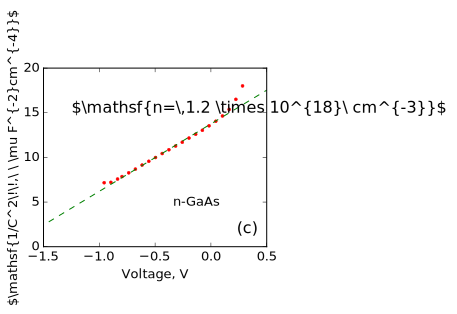

In [7]:
fig = plt.figure()
cv = fig.add_subplot(111)
cv_dat, fit = cv.plot(volt, 1/cap**2, 'r.',
                            volt_fit, cap_fit, 'g--')
#cv.set_xlim(-1.4, 0)
cv.set_xlabel('Voltage, V')
cv.set_ylabel('\$\\'+mathsf+'{1/C^2\!\!,\ \ \mu F^{-2}cm^{-4}}$')


cv.text(-1.25, 15, 
        '\$\\'+mathsf+'{n=\,'+sci_notation(-doping)+'\ cm^{-3}}$',
        fontsize=16)
#cv.annotate('(b)', xy=(1, 0), xycoords='axes fraction',fontsize=16,
#            xytext=(-10, 10), textcoords='offset points',
#            ha='right', va='bottom')

#cv.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
#cv.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#plt.tight_layout()
cv.text(-0.125, 5, 'n-GaAs', va='center', ha='center')
cv.set_xlim(-1.5, 0.5)
cv.set_ylim(0, 20)

cv.annotate('(c)', xy=(1, 0), xycoords='axes fraction',fontsize=16,
            xytext=(-10, 10), textcoords='offset points',
            ha='right', va='bottom')


name3 = 'IP_InAs_CV_fig3'
plt.savefig(name3+'.svg', transparent=True)